# Part 3: Visual Overview of Plotting Functions

We've talked a lot about laying things out, etc, but we haven't talked about actually plotting data yet. Matplotlib has a number of different plotting functions -- many more than we'll cover here, in fact. There's a more complete list in the pyplot documentation, and Matplotlib gallery is a great place to get examples of all of them.  

However, a full list and/or the gallery can be a bit overwhelming at first. Instead we'll condense it down and give you a look at some of the ones you're most likely to use, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.  Let's browse through these, and then we'll go over a few in more detail. Clicking on any of these images will take you to the code that generated them. We'll skip that for now, but feel browse through it later.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [53]:
x = np.arange(0, 1.1, .05)
y = x**2
scale = np.random.rand(len(x))

In [54]:
scale

array([0.09834683, 0.42110763, 0.95788953, 0.53316528, 0.69187711,
       0.31551563, 0.68650093, 0.83462567, 0.01828828, 0.75014431,
       0.98886109, 0.74816565, 0.28044399, 0.78927933, 0.10322601,
       0.44789353, 0.9085955 , 0.29361415, 0.28777534, 0.13002857,
       0.01936696, 0.67883553])

Text(0.5, 1.0, 'axes.fill_between')

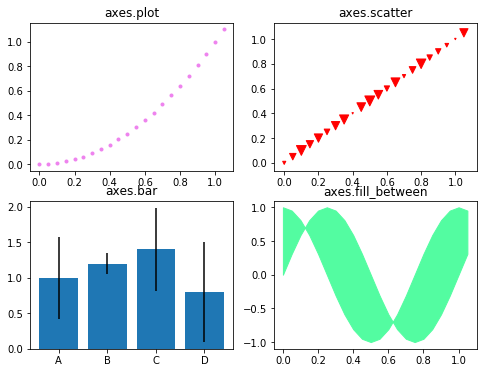

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax[0, 0].plot(x, x**2, '.', c='violet')
ax[0, 0].set_title('axes.plot')

ax[0, 1].scatter(x, x, s=scale*100, marker='v', c='red')
ax[0, 1].set_title('axes.scatter')

ax[1, 0].bar(['A', 'B', 'C', 'D'], [1.0, 1.2, 1.4, .8], yerr=np.random.rand(4))
ax[1, 0].set_title('axes.bar')

ax[1, 1].fill_between(x, np.sin(2*np.pi*x), np.cos(2*np.pi*x), color="xkcd:sea green")
ax[1, 1].set_title('axes.fill_between')

# Input Data: 2D Arrays or Images

There are several options for plotting 2D datasets.  `imshow`, `pcolor`, and `pcolormesh` have a lot of overlap, at first glance.  The image below is meant to clarify that somewhat.

<img src="images/imshow_example.png">
<img src="images/pcolor_example.png">

In short, `imshow` can interpolate and display large arrays very quickly, while `pcolormesh` and `pcolor` are much slower, but can handle flexible (i.e. more than just rectangular) arrangements of cells.

We won't dwell too much on the differences and overlaps here.  They have overlapping capabilities, but different default behavior because their primary use-cases are a bit different (there's also `matshow`, which is `imshow` with different defaults).  

Instead we'll focus on what they have in common.

`imshow`, `pcolor`, `pcolormesh`, `scatter`, and any other Matplotlib plotting methods that map a range of data values onto a colormap will return artists that are instances of `ScalarMappable.`  In practice, what that means is a) you can display a colorbar for them, and b) they share several keyword arguments.

### Colorbars

Let's add a colorbar to the figure to display what colors correspond to values of `data` we've plotted. 

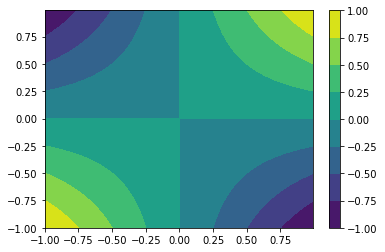

In [70]:
fig, ax = plt.subplots(1, 1)

x = np.arange(-1, 1, .01)
y = np.arange(-1, 1, .01)

# Outer product is the opposite of inner product, giving a matrix.
z = np.outer(x, y)

mapped_data = ax.contourf(x, y, z)
colorbar = fig.colorbar(mapped_data)

<div class="alert alert-block alert-info">
    <b>Exercise 1</b> <p>Try it out: Make a figure with two subfigures, one with a color map and one with a different type of plot!
</div>